<a href="https://colab.research.google.com/github/SoyCristian98/Entrega---Proyecto-IA/blob/main/Copia_de_la_copia_de_ProyectoAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.7 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#from google.colab import drive
#drive.mount('/content/DataSet_proyect.xlsx')

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator

In [9]:
df= pd.read_excel('/content/drive/MyDrive/Proyecto_Curso_IA/DataSet_proyect.xlsx')
print(df.head())

   Sr.No.  Course Job profession Student  Linguistic  Musical  Bodily  \
0     1.0     NaN   Astronomer\n      S1          11        5      12   
1     NaN     NaN   Astronomer\n      S2          12        6      12   
2     NaN     NaN   Astronomer\n      S3          13        7      12   
3     NaN     NaN   Astronomer\n      S4          14        8      12   
4     NaN     NaN   Astronomer\n      S5          13        9      12   

   Logical - Mathematical  Spatial-Visualization  Interpersonal  ...  \
0                      16                     17             11  ...   
1                      16                     16             11  ...   
2                      16                     15             11  ...   
3                      16                     19             11  ...   
4                      16                     20             11  ...   

   Naturalist  s/p   P1    P2   P3    P4    P5   P6    P7    P8  
0          19   s1  AVG  POOR  AVG  BEST  BEST  AVG  BEST  BES

In [10]:
#añadimos columna del id al principio del df
df.insert(0, 'id', range(1, len(df)+1))
df

,id,Sr.No.,Course,Job profession,Student,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,...,Naturalist,s/p,P1,P2,P3,P4,P5,P6,P7,P8
0,1,1.0,NaN,Astronomer\n,S1,11,5,12,16,17,...,19,s1,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
1,2,NaN,NaN,Astronomer\n,S2,12,6,12,16,16,...,19,s2,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
2,3,NaN,NaN,Astronomer\n,S3,13,7,12,16,15,...,19,s3,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
3,4,NaN,NaN,Astronomer\n,S4,14,8,12,16,19,...,19,s4,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
4,5,NaN,NaN,Astronomer\n,S5,13,9,12,16,20,...,19,s5,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3596,NaN,NaN,Technician,S3596,8,7,15,12,14,...,11,s3596,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG
3596,3597,NaN,NaN,Technician,S3597,9,8,16,11,13,...,12,s3597,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG
3597,3598,NaN,NaN,Technician,S3598,10,8,17,12,11,...,14,s3598,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG
3598,3599,NaN,NaN,Technician,S3599,6,9,19,13,13,...,11,s3599,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG


In [11]:
#Mostrar columnas
df.columns[:]

Index(['id', 'Sr.No.', 'Course', 'Job profession', 'Student', 'Linguistic',
       'Musical', 'Bodily', 'Logical - Mathematical', 'Spatial-Visualization',
       'Interpersonal', 'Intrapersonal', 'Naturalist', 's/p', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8'],
      dtype='object')

In [12]:
#Columnas que utilizaremos
cols_mantener = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_new = df.iloc[:, cols_mantener]
df_new

,id,Course,Job profession,Student,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,1,NaN,Astronomer\n,S1,11,5,12,16,17,11,18,19
1,2,NaN,Astronomer\n,S2,12,6,12,16,16,11,18,19
2,3,NaN,Astronomer\n,S3,13,7,12,16,15,11,18,19
3,4,NaN,Astronomer\n,S4,14,8,12,16,19,11,18,19
4,5,NaN,Astronomer\n,S5,13,9,12,16,20,11,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3596,NaN,Technician,S3596,8,7,15,12,14,15,14,11
3596,3597,NaN,Technician,S3597,9,8,16,11,13,16,14,12
3597,3598,NaN,Technician,S3598,10,8,17,12,11,17,14,14
3598,3599,NaN,Technician,S3599,6,9,19,13,13,18,13,11


In [13]:
df_new['Job profession'].unique()

array(['Astronomer\n', 'Geologist', 'Marine Biologist\n', 'Veterinarian',
       'Nature photographer', 'Recording engineer', 'Audiologist',
       'Sound editor', 'Music teacher', 'Actuary', 'Chartered Accountant',
       'Computer analyst', 'Computer programmer', 'Database designer',
       'Economist', 'Librarian', 'Engineer', 'Lawyer', 'Pharmacist',
       'Physician', 'Physicist', 'Mathematician', 'Leader', 'Manager',
       'Politician', 'Social Worker', 'Receptionist',
       'Sales Representative', 'Counselor', 'Athlete', 'Dancer',
       'Mechanic', 'Actor / Actress', 'Physical Therapist', 'Editor',
       'Historian', 'Journalist', 'Language Teacher', 'Poet',
       'Broadcaster', 'Artist', 'Graphic Designer', 'Fashion Designer',
       'Interior Decorator', 'Pilot', 'Psychologist', 'Philosopher',
       'Writer', 'Criminologist', 'Company secretary', 'Marketing',
       'Logistics manager', 'Research analyst', 'Business manager',
       'Internal auditor', 'Chief financial o

In [14]:
#Cambiar algunos nombres de los datos
df3 = df_new.replace(['Astronomer\n', 'Marine Biologist\n'], ['Astronomer', 'Marine Biologist'])
df3

,id,Course,Job profession,Student,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,1,NaN,Astronomer,S1,11,5,12,16,17,11,18,19
1,2,NaN,Astronomer,S2,12,6,12,16,16,11,18,19
2,3,NaN,Astronomer,S3,13,7,12,16,15,11,18,19
3,4,NaN,Astronomer,S4,14,8,12,16,19,11,18,19
4,5,NaN,Astronomer,S5,13,9,12,16,20,11,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3596,NaN,Technician,S3596,8,7,15,12,14,15,14,11
3596,3597,NaN,Technician,S3597,9,8,16,11,13,16,14,12
3597,3598,NaN,Technician,S3598,10,8,17,12,11,17,14,14
3598,3599,NaN,Technician,S3599,6,9,19,13,13,18,13,11


#Ver datos corregidos


In [15]:
df3['Job profession'].unique()

array(['Astronomer', 'Geologist', 'Marine Biologist', 'Veterinarian',
       'Nature photographer', 'Recording engineer', 'Audiologist',
       'Sound editor', 'Music teacher', 'Actuary', 'Chartered Accountant',
       'Computer analyst', 'Computer programmer', 'Database designer',
       'Economist', 'Librarian', 'Engineer', 'Lawyer', 'Pharmacist',
       'Physician', 'Physicist', 'Mathematician', 'Leader', 'Manager',
       'Politician', 'Social Worker', 'Receptionist',
       'Sales Representative', 'Counselor', 'Athlete', 'Dancer',
       'Mechanic', 'Actor / Actress', 'Physical Therapist', 'Editor',
       'Historian', 'Journalist', 'Language Teacher', 'Poet',
       'Broadcaster', 'Artist', 'Graphic Designer', 'Fashion Designer',
       'Interior Decorator', 'Pilot', 'Psychologist', 'Philosopher',
       'Writer', 'Criminologist', 'Company secretary', 'Marketing',
       'Logistics manager', 'Research analyst', 'Business manager',
       'Internal auditor', 'Chief financial offic

##Traducir la base de datos del ingles a español

In [16]:
df3['Profesion'] = df3['Job profession'].apply(lambda x: GoogleTranslator(source='auto', target='es').translate(x))
print(df3)

        id  Course Job profession Student  Linguistic  Musical  Bodily  \
0        1     NaN     Astronomer      S1          11        5      12   
1        2     NaN     Astronomer      S2          12        6      12   
2        3     NaN     Astronomer      S3          13        7      12   
3        4     NaN     Astronomer      S4          14        8      12   
4        5     NaN     Astronomer      S5          13        9      12   
...    ...     ...            ...     ...         ...      ...     ...   
3595  3596     NaN     Technician   S3596           8        7      15   
3596  3597     NaN     Technician   S3597           9        8      16   
3597  3598     NaN     Technician   S3598          10        8      17   
3598  3599     NaN     Technician   S3599           6        9      19   
3599  3600     NaN     Technician   S3600           8        9      18   

      Logical - Mathematical  Spatial-Visualization  Interpersonal  \
0                         16             

In [17]:
df3

,id,Course,Job profession,Student,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist,Profesion
0,1,NaN,Astronomer,S1,11,5,12,16,17,11,18,19,Astrónomo
1,2,NaN,Astronomer,S2,12,6,12,16,16,11,18,19,Astrónomo
2,3,NaN,Astronomer,S3,13,7,12,16,15,11,18,19,Astrónomo
3,4,NaN,Astronomer,S4,14,8,12,16,19,11,18,19,Astrónomo
4,5,NaN,Astronomer,S5,13,9,12,16,20,11,19,19,Astrónomo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3596,NaN,Technician,S3596,8,7,15,12,14,15,14,11,Técnico
3596,3597,NaN,Technician,S3597,9,8,16,11,13,16,14,12,Técnico
3597,3598,NaN,Technician,S3598,10,8,17,12,11,17,14,14,Técnico
3598,3599,NaN,Technician,S3599,6,9,19,13,13,18,13,11,Técnico


In [18]:
#Borrar columnas en ingles y reemplazar con la traduccion en español
df4 = df3.drop(columns=['Job profession', 'Course', 'Student'])
df4

,id,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist,Profesion
0,1,11,5,12,16,17,11,18,19,Astrónomo
1,2,12,6,12,16,16,11,18,19,Astrónomo
2,3,13,7,12,16,15,11,18,19,Astrónomo
3,4,14,8,12,16,19,11,18,19,Astrónomo
4,5,13,9,12,16,20,11,19,19,Astrónomo
...,...,...,...,...,...,...,...,...,...,...
3595,3596,8,7,15,12,14,15,14,11,Técnico
3596,3597,9,8,16,11,13,16,14,12,Técnico
3597,3598,10,8,17,12,11,17,14,14,Técnico
3598,3599,6,9,19,13,13,18,13,11,Técnico


In [19]:
#movemos la columna Profesion a la posición 2
col_mover = df4.pop('Profesion')
df4.insert(1, 'Profesion', col_mover)
df4

,id,Profesion,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,1,Astrónomo,11,5,12,16,17,11,18,19
1,2,Astrónomo,12,6,12,16,16,11,18,19
2,3,Astrónomo,13,7,12,16,15,11,18,19
3,4,Astrónomo,14,8,12,16,19,11,18,19
4,5,Astrónomo,13,9,12,16,20,11,19,19
...,...,...,...,...,...,...,...,...,...,...
3595,3596,Técnico,8,7,15,12,14,15,14,11
3596,3597,Técnico,9,8,16,11,13,16,14,12
3597,3598,Técnico,10,8,17,12,11,17,14,14
3598,3599,Técnico,6,9,19,13,13,18,13,11


In [20]:
#eliminamos espacios iniciales y finales
for i in range(1):
    df4.iloc[:,1] = df4.iloc[:,1].str.strip()
df4

,id,Profesion,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,1,Astrónomo,11,5,12,16,17,11,18,19
1,2,Astrónomo,12,6,12,16,16,11,18,19
2,3,Astrónomo,13,7,12,16,15,11,18,19
3,4,Astrónomo,14,8,12,16,19,11,18,19
4,5,Astrónomo,13,9,12,16,20,11,19,19
...,...,...,...,...,...,...,...,...,...,...
3595,3596,Técnico,8,7,15,12,14,15,14,11
3596,3597,Técnico,9,8,16,11,13,16,14,12
3597,3598,Técnico,10,8,17,12,11,17,14,14
3598,3599,Técnico,6,9,19,13,13,18,13,11


#Investigar
- Maquina de soporte vectorial (SVM)
- Regresión Lineal
- Regresión Logistica

Buscar que información nos esta faltando para que el programa reconozca lo que necesitamos


In [21]:
df4['Profesion'].unique()

array(['Astrónomo', 'Geólogo', 'Biólogo marino', 'Veterinario',
       'Fotógrafo de la naturaleza', 'Ingeniero de grabación',
       'Audiólogo', 'Editor de sonido', 'Profesor de música', 'Actuario',
       'Contador público', 'Analista de computadora',
       'Programas de computadora', 'Diseñador de bases de datos',
       'Economista', 'Bibliotecario', 'Ingeniero', 'Abogado',
       'Farmacéutico', 'Médico', 'Físico', 'Matemático', 'Líder',
       'Gerente', 'Político', 'Asistente social', 'Recepcionista',
       'Representante de ventas', 'Consejero', 'Atleta', 'Bailarín',
       'Mecánico', 'Actor / actriz', 'Fisioterapeuta', 'Editor',
       'Historiador', 'Periodista', 'Profesor de idiomas', 'Poeta',
       'Locutor', 'Artista', 'Diseñador gráfico', 'Diseñador de moda',
       'Decorador de interiores', 'Piloto', 'Psicólogo', 'Filósofo',
       'Escritor', 'Criminologista', 'Secretario de la compañía',
       'Marketing', 'Gerente de logística', 'Analista de investigación',
   

#05 de Junio

In [22]:
df4['Profesion'] = df4['Profesion'].replace({'Secretario de la compañía': 'Secretario', 'Profesor previo a la primaria (2020 NEP y salud mental)': 'Profesor de primera infancia', 'Maestros y profesores de escuela secundaria': 'Profesor de secundaria',
                                             'Para Medical (fisioterapia, tertopía ocupacional, audio y teropía del lenguaje del habla, enfermería)': 'Paramedico', 'Milidería': 'Militar',
                                             'Para Militería (https://en.wikipedia.org/wiki/paramilitary_forces_of_india)': 'Medico Militar', 'Fuerza policial (espías, funcionarios de CBI, CID, detectives)': 'Fuerzas Especiales'})

In [23]:
df4 = df4.rename(columns = {'Linguistic' : 'Lengua Castellana',
 'Musical' : 'Artistica',
 'Bodily' : 'Educacion Fisica',
 'Logical - Mathematical' : 'Matemáticas',
 'Spatial-Visualization' : 'Dibujo Técnico',
 'Interpersonal' : 'Civica y Urbanidad',
 'Intrapersonal' : 'Ética y Valores',
 'Naturalist' : 'Ciencias Naturales'})

In [24]:
df4['Profesion'].unique()

array(['Astrónomo', 'Geólogo', 'Biólogo marino', 'Veterinario',
       'Fotógrafo de la naturaleza', 'Ingeniero de grabación',
       'Audiólogo', 'Editor de sonido', 'Profesor de música', 'Actuario',
       'Contador público', 'Analista de computadora',
       'Programas de computadora', 'Diseñador de bases de datos',
       'Economista', 'Bibliotecario', 'Ingeniero', 'Abogado',
       'Farmacéutico', 'Médico', 'Físico', 'Matemático', 'Líder',
       'Gerente', 'Político', 'Asistente social', 'Recepcionista',
       'Representante de ventas', 'Consejero', 'Atleta', 'Bailarín',
       'Mecánico', 'Actor / actriz', 'Fisioterapeuta', 'Editor',
       'Historiador', 'Periodista', 'Profesor de idiomas', 'Poeta',
       'Locutor', 'Artista', 'Diseñador gráfico', 'Diseñador de moda',
       'Decorador de interiores', 'Piloto', 'Psicólogo', 'Filósofo',
       'Escritor', 'Criminologista', 'Secretario', 'Marketing',
       'Gerente de logística', 'Analista de investigación',
       'Gerente de

##Separamos el Dataset

In [25]:
#librerias
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [26]:
#identifiquemos nuestras variables

#variable predictora
X = df4.iloc[:,2:]
#variable a predecir
Y = df4['Profesion']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

- Modelo Multiclase
- GaussianNB para modelo Binomial: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- LabelEconder para convertir palabras en números: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- En el modelo SMV buscar un algoritmo que soporte las clases (Profesiones) y (Materias) . . . Algoritmo que soporte muchas clases

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
Y_predic=classifier.predict(X_test)


In [30]:
from sklearn.metrics import  classification_report, confusion_matrix,accuracy_score

result= confusion_matrix(Y_test,Y_predic)
print(" Confusion Martrix: ")
print(result)


result1= classification_report(Y_test,Y_predic)
print("Classification Report: ",)
print (result1)


result2 = accuracy_score(Y_test,Y_predic)
print("Accuracy:",result2)


 Confusion Martrix: 
[[14  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report: 
                              precision    recall  f1-score   support

                     Abogado       1.00      1.00      1.00        14
              Actor / actriz       1.00      1.00      1.00        19
                    Actuario       1.00      0.94      0.97        17
             Agente de bolsa       0.93      1.00      0.97        14
     Analista de computadora       1.00      1.00      1.00        20
   Analista de investigación       1.00      1.00      1.00        15
        Analista de negocios       1.00      1.00      1.00        16
                 Antropólogo       1.00      1.00      1.00        21
                  Arqueólogo       1.00      1.00      1.00         9
                     Artista       1.00      1.00      1.00        12
           Asesor financiero

## Analisis exploratorio y Graficos

In [31]:
# Simular un estudiante con valores existentes del ejemplo en las 8 inteligencias
nuevo_estudiante = [[11, 5, 12, 16, 17, 11, 18, 19]]
prediccion = classifier.predict(nuevo_estudiante)
print("Profesión sugerida para el nuevo estudiante:", prediccion[0])
result3 = accuracy_score(Y_test,Y_predic)
print(result3)

Profesión sugerida para el nuevo estudiante: Astrónomo
0.975


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
#agregar estudiante nuevo
nuevo_estudiante = [[5,10 ,19 ,20 ,4 ,10 ,11 ,15 ]]
prediccion = classifier.predict(nuevo_estudiante)
print("Profesión sugerida para el nuevo estudiante:", prediccion[0])
result3 = accuracy_score(Y_test,Y_predic)
print(result3)

Profesión sugerida para el nuevo estudiante: Fisioterapeuta
0.975


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
#revision general de la infromacion del dataset
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3600 non-null   int64 
 1   Profesion           3600 non-null   object
 2   Lengua Castellana   3600 non-null   int64 
 3   Artistica           3600 non-null   int64 
 4   Educacion Fisica    3600 non-null   int64 
 5   Matemáticas         3600 non-null   int64 
 6   Dibujo Técnico      3600 non-null   int64 
 7   Civica y Urbanidad  3600 non-null   int64 
 8   Ética y Valores     3600 non-null   int64 
 9   Ciencias Naturales  3600 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 281.4+ KB
None


In [34]:
#revision estadistica sobre los datos y la informacion que contiene el dataset
print(df4.describe())

                id  Lengua Castellana    Artistica  Educacion Fisica  \
count  3600.000000        3600.000000  3600.000000       3600.000000   
mean   1800.500000          13.064167     9.538333         12.080278   
std    1039.374812           3.705923     4.270472          4.298006   
min       1.000000           5.000000     5.000000          5.000000   
25%     900.750000          11.000000     6.000000          8.000000   
50%    1800.500000          13.000000     8.000000         12.000000   
75%    2700.250000          16.000000    12.000000         15.000000   
max    3600.000000          20.000000    20.000000         20.000000   

       Matemáticas  Dibujo Técnico  Civica y Urbanidad  Ética y Valores  \
count  3600.000000     3600.000000         3600.000000      3600.000000   
mean     15.510556        9.771389           15.546389        14.764167   
std       3.843261        3.719793            3.523046         3.586535   
min       5.000000        5.000000            2.000

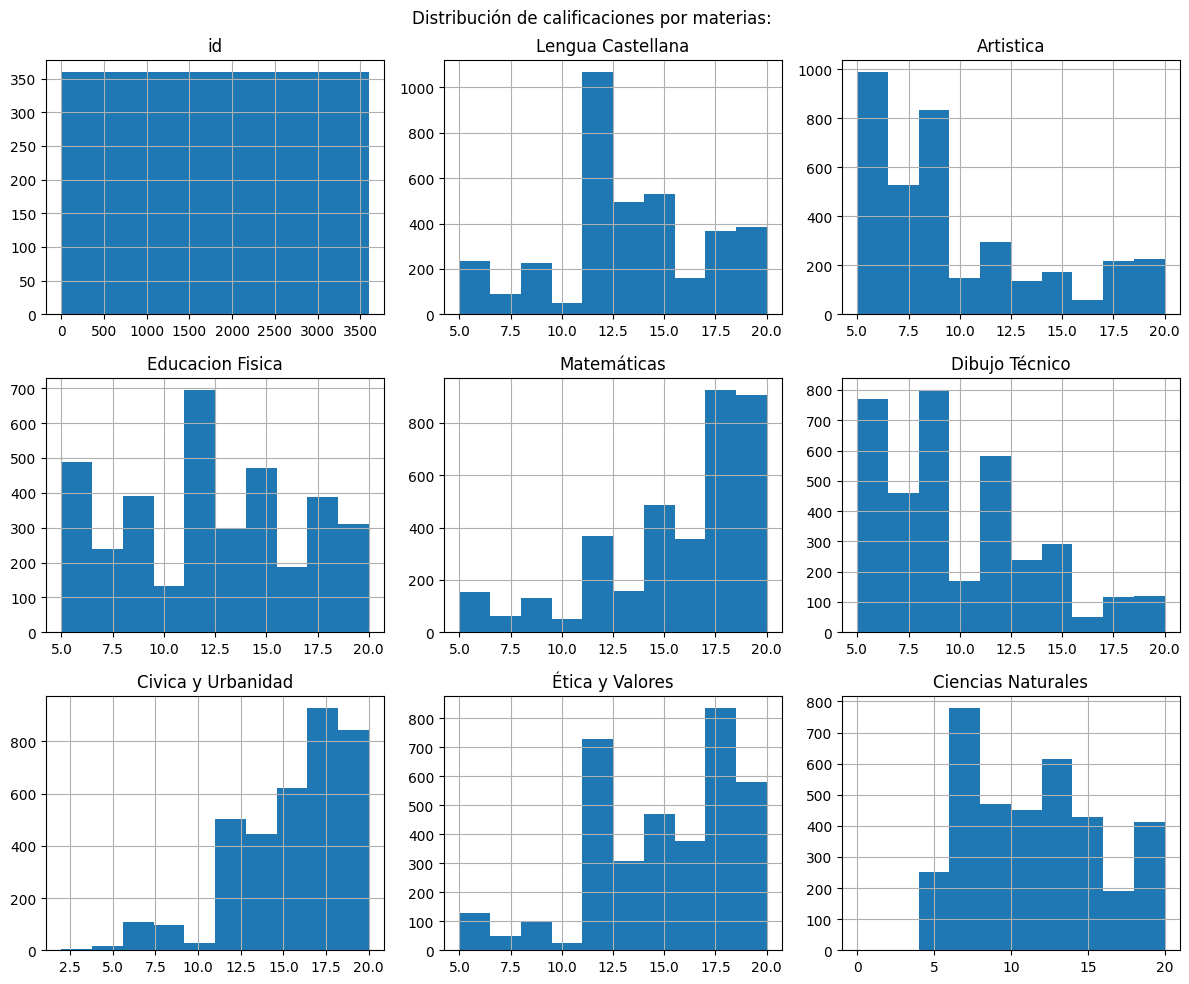

In [35]:
#Grafico estdudiantes vs notas

df4.hist(figsize=(12, 10), bins=10)
plt.suptitle("Distribución de calificaciones por materias: ")
plt.tight_layout()
plt.show()


#en este grafico se muestra una distribucion en relacion

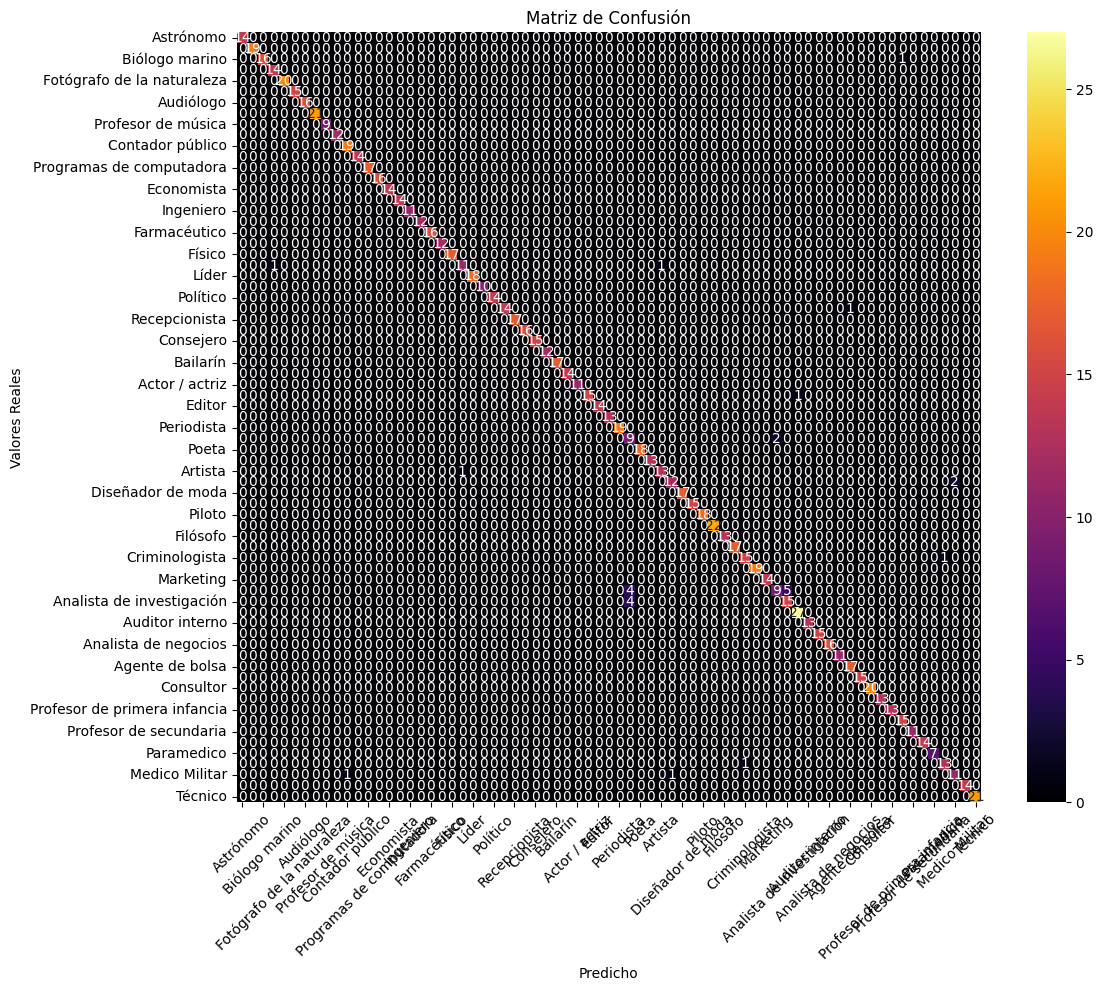

In [36]:
#grafico de matriz de confusión
def plot_conf_matrix(result, color, labels):
    classes = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical', 'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']
    df_result = pd.DataFrame(result, index=labels, columns=labels)
    plt.figure(figsize=(12,10)) #Ajusta el tamaño según número de clases
    ax = sns.heatmap(df_result, annot=True, fmt='d', cmap=color)
    ax.set_xlabel('Predicho')
    ax.set_ylabel('Valores Reales')
    ax.set_title('Matriz de Confusión')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

#Llamar la función
plot_conf_matrix(result, 'inferno', df4['Profesion'].unique())


In [37]:
1#convertir nota de escala 1-5 a escala 1-20, para facilitar la interacción con el usuario
def convertir_nota_5_a_20(nota_5):
    if not (1 <= nota_5 <= 5):
        raise ValueError("La nota debe estar entre 1 y 5, puede ser decimal")
    #Conversion lineal de la escala 1-5 a 1-20
    nota_20 = ((nota_5 -1) / 4) * 19 + 1
    return nota_20
lista_notas = []
lista_notas_5 = []
columnas = df4.columns[2:]
for j in columnas:
    lista_notas_5.append(input(f"Escribe tu nota {j}: "))
for item in lista_notas_5:
    lista_notas.append(convertir_nota_5_a_20(float(item)))
#nota = input("Escribe una nota: ")
#convertir_nota_5_a_20(float(nota))
#nota2 = input("Escribe una nota2: ")
#lista = [nota, nota2]
lista_notas



# Convertir lista 1D a 2D para predict()
nuevo_estudiante = [lista_notas]  # Nota: ahora es lista dentro de lista

# Hacer predicción
prediccion = classifier.predict(nuevo_estudiante)

print("Profesión sugerida para el nuevo estudiante:", prediccion[0])

# Mostrar el accuracy general del modelo
print("Accuracy del modelo en test:", accuracy_score(Y_test, Y_predic))


Escribe tu nota Lengua Castellana: 5
Escribe tu nota Artistica: 5
Escribe tu nota Educacion Fisica: 4
Escribe tu nota Matemáticas: 4
Escribe tu nota Dibujo Técnico: 3
Escribe tu nota Civica y Urbanidad: 4
Escribe tu nota Ética y Valores: 5
Escribe tu nota Ciencias Naturales: 3
Profesión sugerida para el nuevo estudiante: Actuario
Accuracy del modelo en test: 0.975


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:

df4 = df4.rename(columns = {'Linguistic' : 'Lengua Castellana',
 'Musical' : 'Artistica',
 'Bodily' : 'Educacion Fisica',
 'Logical - Mathematical' : 'Matemáticas',
 'Spatial-Visualization' : 'Dibujo Técnico',
 'Interpersonal' : 'Civica y Urbanidad',
 'Intrapersonal' : 'Ética y Valores',
 'Naturalist' : 'Ciencias Naturales'})
list(df4.columns)

['id',
 'Profesion',
 'Lengua Castellana',
 'Artistica',
 'Educacion Fisica',
 'Matemáticas',
 'Dibujo Técnico',
 'Civica y Urbanidad',
 'Ética y Valores',
 'Ciencias Naturales']

In [39]:
#guardar el modelo para no tener que entrenarlo de una y seguir
import pickle

In [ ]:
pickle.dump(classifier, open("Copia_de_la_copia_de_ProyectoAi.pkl", "wb"))